In [278]:
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import sys

eval_counterfactuals = False
if eval_counterfactuals:
    qa_check_df = pd.read_csv("data/qa_check_counterfactuals_v1.csv")
    perturbation_path = "/data/nikitha/VQA_data/results/webqa_yesno"
    qa_check_df['file'] = qa_check_df.apply(lambda x: x['image_id'] + "_" + x['question_id'] + ".jpeg", axis=1)
else:
    qa_check_df = pd.read_csv("data/qa_check_perturbation_v4.csv")
    qa_check_df['question_id'] = qa_check_df['file'].apply(lambda x: (x.split('.')[0]).split('_')[1])
    qa_check_df['image_id'] = qa_check_df['file'].apply(lambda x: (x.split('.')[0]).split('_')[0])
    perturbation_path = "/data/nikitha/VQA_data/results/old/bad_idx/webqa"
    
qa_check_df['passes'] = qa_check_df['qa_check'].apply(lambda llm_output: llm_output.strip().lower().startswith('no'))

eval_data = json.load(open("/data/nikitha/VQA_data/WebQA_train_val_obj_v2.json", "r"))
perturbation_detected_keys = qa_check_df[qa_check_df['passes'] == True][["question_id","image_id","file"]].values.tolist()
perturbation_undetected_keys = qa_check_df[qa_check_df['passes'] == False][["question_id","image_id","file"]].values.tolist()
len(perturbation_detected_keys), len(perturbation_undetected_keys)

(23, 46)

In [280]:
display_idx = 11

In [293]:
%matplotlib inline
import random
from eval.eval_utils import *


# compare perturbed and original image side by side
# example_keys = [(k, id) for k, id in perturbation_detected_keys if len(eval_data[k]['img_posFacts']) == 1]

# check quality of samples that passed the QA check, focus on minimising FPs. FNs dont matter since we have sufficient data to finetune model 
example_keys = perturbation_detected_keys
key, image_id, file = example_keys[display_idx]
display_idx += 1
# key, image_id, file = example_keys[random.randint(0, len(example_keys))]
imgs = get_images([image_id, f"{perturbation_path}/{file}"])
q = capitalize_word_in_sentence(eval_data[key]['Q'], eval_data[key]['Q_obj'])

print("object removed: ", eval_data[key]['Q_obj'])
print(image_equals(imgs[0], imgs[1]))
display_images(imgs[0], imgs[1], q, "original", "perturbed", savefile=False)

IndexError: list index out of range

object removed:  Seattle Space Needle, TWA Flight Center
original answer:  ['"Both the Seattle Space Needle at night and the TWA Flight Center at JFK Airport are gold."']
False


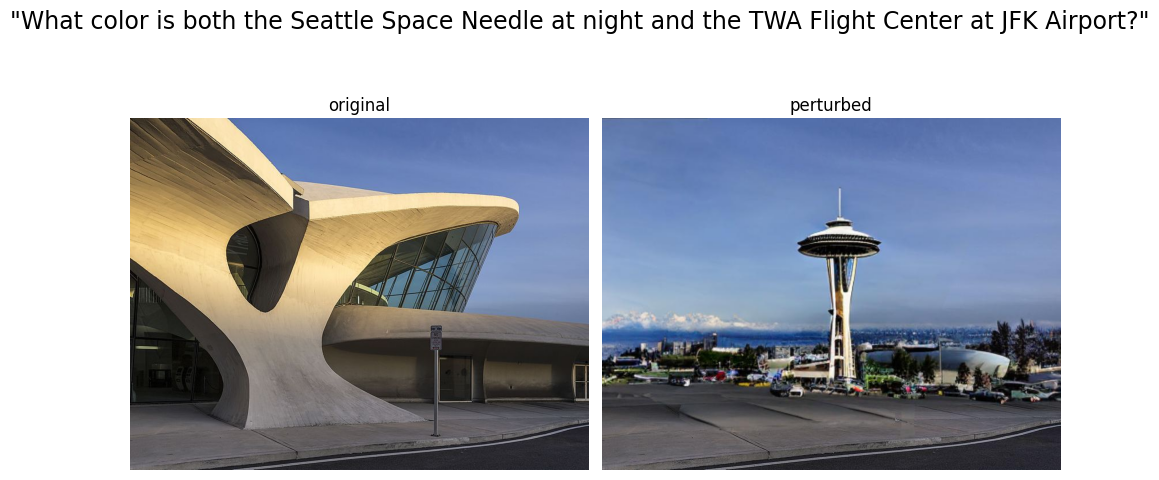

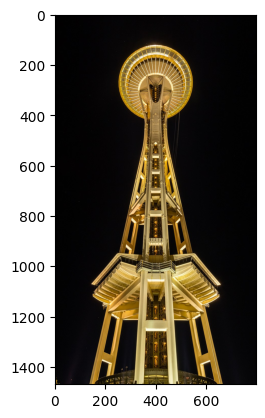

In [60]:
%matplotlib inline
import random
from eval.eval_utils import *


# compare perturbed and original image side by side
# example_keys = [(k, id) for k, id in perturbation_detected_keys if len(eval_data[k]['img_posFacts']) == 1]
example_keys = perturbation_detected_keys
def get_other_img(img_id, imgs):
    for img in imgs:
        if int(img['image_id']) != int(img_id):
            return img['image_id']

example_2_img_keys = [(k, id, file) for k, id, file in example_keys if len(eval_data[k]['img_posFacts']) == 2]
key, image_id, file = example_2_img_keys[random.randint(0, len(example_2_img_keys))]
imgs = get_images([image_id, f"{perturbation_path}/{file}", get_other_img(image_id, eval_data[key]['img_posFacts'])])
q = capitalize_word_in_sentence(eval_data[key]['Q'], eval_data[key]['Q_obj'])

print("object removed: ", eval_data[key]['Q_obj'])
print("original answer: ", eval_data[key]['A'])
print(image_equals(imgs[0], imgs[1]))
display_images(imgs[0], imgs[1], q, "original", "perturbed", savefile=False)
plt.imshow(imgs[2])

In [209]:
# print(len(perturbation_detected_keys))
# # dump keys to csv
# import csv
# with open(f"results/counterfactual_qa_check.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(perturbation_detected_keys)

787


: 